In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
df= pd.read_csv('lcDataSample.csv')

C:\Users\somya\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (47,55,132) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
pd.options.display.float_format = '{:.2f}'.format

In [4]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,4400,4400,4400.00,36 months,22.99,170.30,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,5850,5850,5850.00,36 months,21.99,223.39,E,E4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.00,36 months,6.24,152.66,A,A2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,1600,1600,1600.00,36 months,14.99,55.46,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,16000,16000,16000.00,36 months,9.17,510.07,B,B2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.shape

(110000, 145)

In [6]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,url,desc,...,hardship_length,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage
count,0.00,0.00,110000.00,110000.00,110000.00,110000.00,110000.00,110000.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
mean,NaN,NaN,12684.47,12684.18,12677.93,12.05,420.46,72979.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,7856.62,7856.43,7852.82,3.87,261.61,66037.73,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1000.00,1000.00,900.00,5.32,30.44,0.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,7000.00,7000.00,7000.00,8.90,226.40,43000.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,10000.00,10000.00,10000.00,11.99,349.36,60000.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,16750.00,16750.00,16750.00,14.48,554.58,88000.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,35000.00,35000.00,35000.00,28.99,1445.46,8253000.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Target variable is loan status which tells us whether or not a loan was fully paid

In [7]:
df.groupby(["loan_status"]).size()

loan_status
Charged Off           15377
Current                  17
Fully Paid            94567
In Grace Period           2
Late (16-30 days)         1
Late (31-120 days)       36
dtype: int64

## Selecting "Fully Paid" and "Charged Off" loans only


In [8]:
df = df.loc[(df['loan_status'] == 'Fully Paid') | (df['loan_status'] == 'Charged Off')]

Another important feature is the LC assigned loan grade. 
Loan grades assigned by lending platforms indicate the loan's risk level, with higher grades representing lower risk and lower grades representing higher risk (e.g., A as the least risky and F as the riskiest).

In [9]:
#Checking how loan status varies by loan grade
df.groupby(["loan_status", "grade"]).size()

loan_status  grade
Charged Off  A         1369
             B         4264
             C         5206
             D         3165
             E         1090
             F          252
             G           31
Fully Paid   A        23485
             B        33601
             C        23939
             D        10290
             E         2700
             F          501
             G           51
dtype: int64

In [10]:
prop_table = df.groupby(["grade", "loan_status"]).size().unstack()
prop_table['defaultRate'] = 100 * prop_table['Charged Off'] / prop_table.sum(axis=1)
prop_table

loan_status,Charged Off,Fully Paid,defaultRate
grade,,,
A,1369,23485,5.51
B,4264,33601,11.26
C,5206,23939,17.86
D,3165,10290,23.52
E,1090,2700,28.76
F,252,501,33.47
G,31,51,37.80


We can see that most of the loans in the dataset are in grades A, B, and C, with relatively fewer loans in grades D, E, F, and G. In addition, the majority of loans in all grades have been fully paid, with a small proportion of loans being charged off (default rate). However, we can also see that the proportion of charged off loans increases as the grade gets lower, indicating that loans with lower grades (higher risk) are more likely to result in default.

We can also look further into loan subgrade

In [11]:
result = df.groupby(["sub_grade","loan_status"]).size().reset_index(name='count')
result

,sub_grade,loan_status,count
0,A1,Charged Off,104
1,A1,Fully Paid,3934
2,A2,Charged Off,161
3,A2,Fully Paid,3745
4,A3,Charged Off,193
...,...,...,...
64,G3,Charged Off,5
65,G3,Fully Paid,8
66,G4,Charged Off,3
67,G4,Fully Paid,7


Checking how the number of loans, payments, loan amount, interest rate varies by grade

In [12]:
summary = df.groupby('grade').agg(
    nLoans=('grade', 'size'),
    defaults=('loan_status', lambda x: sum(x == 'Charged Off')),
    defaultRate=('loan_status', lambda x: sum(x == 'Charged Off') / len(x)),
    avgInterest=('int_rate', 'mean'),
    avgLoanAMt=('loan_amnt', 'mean'),
    avgPmnt=('total_pymnt', 'mean')
).reset_index()

print("Summary table:")
print(summary)

Summary table:
  grade  nLoans  defaults  defaultRate  avgInterest  avgLoanAMt  avgPmnt
0     A   24854      1369         0.06         7.21    14349.12 15388.03
1     B   37865      4264         0.11        10.86    12506.13 13633.98
2     C   29145      5206         0.18        13.94    12047.90 13093.65
3     D   13455      3165         0.24        17.26    11895.95 12831.49
4     E    3790      1090         0.29        19.96    11924.06 12624.33
5     F     753       252         0.33        23.86     9434.73  9952.69
6     G      82        31         0.38        26.49    11550.30 11835.57


From the table, we can infer that the default rate increases as the loan grade goes from A to G. The average interest rate also increases as the loan grade goes from A to G, indicating that higher interest rates are charged on loans with higher risk of default. Additionally, we can see that the average loan amount is highest for grade A loans, and gradually decreases for lower grade loans.

In [13]:
#Relationship between loan amount and loan status
df.groupby('loan_status')['loan_amnt'].agg(['size', 'mean']).reset_index()

,loan_status,size,mean
0,Charged Off,15377,12337.09
1,Fully Paid,94567,12741.34


###### Let's look at Fully Paid loans and see how the the time-to-full-payoff varies

For this, we can calculate the 'actual term' (issue-date to last-payment-date) for all loans:

In [14]:
print(df['last_pymnt_d'].dtypes)

object


In [15]:
df['last_pymnt_d'].value_counts(dropna= False)

Mar-17    2908
Mar-16    2789
Oct-16    2493
Jul-16    2457
Aug-17    2444
          ... 
Jun-12      19
May-12      17
Apr-12      11
Mar-12       7
Feb-12       1
Name: last_pymnt_d, Length: 86, dtype: int64

In [16]:
df.dropna(subset=['last_pymnt_d'], inplace=True)

In [17]:
df['issue_d'].dtypes

dtype('O')

In [18]:
df['issue_d'].value_counts(dropna= False)

2015-10-01T00:00:00Z    6097
2015-07-01T00:00:00Z    5719
2015-12-01T00:00:00Z    5640
2014-10-01T00:00:00Z    4981
2015-11-01T00:00:00Z    4789
2015-08-01T00:00:00Z    4471
2015-04-01T00:00:00Z    4404
2015-01-01T00:00:00Z    4397
2015-05-01T00:00:00Z    4126
2014-07-01T00:00:00Z    3708
2015-06-01T00:00:00Z    3579
2015-09-01T00:00:00Z    3420
2014-11-01T00:00:00Z    3154
2015-03-01T00:00:00Z    3056
2015-02-01T00:00:00Z    2987
2014-08-01T00:00:00Z    2520
2014-05-01T00:00:00Z    2491
2014-04-01T00:00:00Z    2405
2014-03-01T00:00:00Z    2208
2014-01-01T00:00:00Z    2172
2014-06-01T00:00:00Z    2164
2013-12-01T00:00:00Z    2116
2014-02-01T00:00:00Z    2055
2013-11-01T00:00:00Z    2020
2013-10-01T00:00:00Z    1862
2013-09-01T00:00:00Z    1701
2013-07-01T00:00:00Z    1679
2013-08-01T00:00:00Z    1676
2013-06-01T00:00:00Z    1590
2013-05-01T00:00:00Z    1450
2014-09-01T00:00:00Z    1375
2013-04-01T00:00:00Z    1303
2014-12-01T00:00:00Z    1280
2013-03-01T00:00:00Z    1206
2013-02-01T00:

In [19]:
df['issue_d'] = pd.to_datetime(df['issue_d'])
df['issue_d'] = df['issue_d'].apply(lambda x: x.date())

In [20]:
print(df['issue_d'].dtypes)

object


In [21]:
df['issue_d'] = pd.to_datetime(df['issue_d'])
# print(df['issue_d'].dtypes)

In [22]:
df['issue_d'].value_counts(dropna= False).head(10)

2015-10-01    6097
2015-07-01    5719
2015-12-01    5640
2014-10-01    4981
2015-11-01    4789
2015-08-01    4471
2015-04-01    4404
2015-01-01    4397
2015-05-01    4126
2014-07-01    3708
Name: issue_d, dtype: int64

In [23]:
def format_date(input_date):
    dt = datetime.strptime(str(input_date), '%b-%y')
    dt = dt.replace(day=1)
    formatted_date = datetime(dt.year, dt.month, dt.day)
    return formatted_date    

In [24]:
df['last_pymnt_d'] = df['last_pymnt_d'].apply(format_date)

In [25]:
df['last_pymnt_d'].value_counts().head(10)

2017-03-01    2908
2016-03-01    2789
2016-10-01    2493
2016-07-01    2457
2017-08-01    2444
2016-06-01    2429
2016-08-01    2409
2016-02-01    2392
2016-09-01    2387
2016-12-01    2353
Name: last_pymnt_d, dtype: int64

In [26]:
print(df['last_pymnt_d'].dtypes)

datetime64[ns]


### Lets look at recoveries

In [27]:
df.groupby('loan_status')['recoveries'].sum()

loan_status
Charged Off   14133922.88
Fully Paid           0.00
Name: recoveries, dtype: float64

All recoveries are only for Charged Off loans.
We can also look at other variables that include recoveries. 

In [28]:
summary = df.groupby('loan_status').agg(
    avgRec = ('recoveries' , 'mean'),
    totalrecPrncp=('total_rec_prncp', 'mean'),
    totalrecInterest=('total_rec_int', 'mean'),
    totalrecLateFee=('total_rec_late_fee', 'mean'),
    avgInterest=('int_rate', 'mean'),
    avgFundAmt = ('funded_amnt', 'mean'),
    avgLoanAMt=('loan_amnt', 'mean'),
    avgPmnt=('total_pymnt', 'mean')
).reset_index()

print("Summary table:")
print(summary)

Summary table:
   loan_status  avgRec  totalrecPrncp  totalrecInterest  totalrecLateFee  \
0  Charged Off  923.36        5218.14           1763.97             3.80   
1   Fully Paid    0.00       12741.03           1936.81             0.76   

   avgInterest  avgFundAmt  avgLoanAMt  avgPmnt  
0        13.86    12335.05    12335.29  7909.28  
1        11.75    12741.03    12741.34 14678.60  


### Lets examine actual returns from a loan, and relation with int_rate
#### (for example, can one expect a 5%/year return from a loan with 5% int_rate?)

In [29]:
df[['loan_status', 'int_rate', 'funded_amnt', 'total_pymnt']].head(10)

,loan_status,int_rate,funded_amnt,total_pymnt
0,Fully Paid,22.99,4400,6119.55
1,Fully Paid,21.99,5850,6376.61
2,Fully Paid,6.24,5000,5496.04
3,Fully Paid,14.99,1600,1839.64
4,Fully Paid,9.17,16000,18128.41
5,Fully Paid,8.18,3000,3393.56
6,Fully Paid,10.99,9000,10592.48
7,Fully Paid,8.90,12000,13492.75
8,Fully Paid,7.26,7000,7805.34
9,Fully Paid,6.99,18000,19780.32


In [30]:
df['annRet'] = ((df['total_pymnt'] - df['funded_amnt'])/ df['funded_amnt'])*(12/36)*100

In [31]:
summary_df = df.groupby('grade').agg(
    nLoans=('grade', 'size'),  # Number of loans
    defaults=('loan_status', lambda x: sum(x == 'Charged Off')),  # Count of defaulted loans
    avgInterest=('int_rate', 'mean'),  # Average interest rate
    stdInterest=('int_rate', 'std'),  # Standard deviation of interest rate
    avgLoanAMt=('loan_amnt', 'mean'),  # Average loan amount
    avgPmnt=('total_pymnt', 'mean'),  # Average total payment
    avgRet=('annRet', 'mean'),  # Average annual return
    stdRet=('annRet', 'std'),  # Standard deviation of annual return
    minRet=('annRet', 'min'),  # Minimum annual return
    maxRet=('annRet', 'max')  # Maximum annual return
)

summary_df


,nLoans,defaults,avgInterest,stdInterest,avgLoanAMt,avgPmnt,avgRet,stdRet,minRet,maxRet
grade,,,,,,,,,,
A,24847,1362,7.21,0.97,14349.68,15391.25,2.35,4.14,-32.34,5.80
B,37851,4250,10.86,1.48,12506.34,13638.80,2.96,6.18,-32.28,13.82
C,29130,5191,13.94,1.23,12049.12,13100.00,2.87,8.12,-32.27,10.53
D,13430,3140,17.26,1.22,11887.56,12852.04,2.86,9.93,-32.21,11.95
E,3782,1082,19.96,1.40,11930.66,12649.64,2.60,11.27,-32.17,14.03
F,752,251,23.86,0.95,9431.95,9963.43,2.99,12.89,-32.02,18.03
G,82,31,26.49,0.96,11550.30,11835.57,1.36,14.92,-28.56,16.95


Where do the negative numbers for minRet come from?

In [32]:
neg_ret = df[df['annRet'] < 0][['loan_status', 'int_rate', 'funded_amnt', 'total_pymnt', 'annRet']]
neg_ret.head(10)

,loan_status,int_rate,funded_amnt,total_pymnt,annRet
14,Charged Off,13.35,6500,2701.43,-19.48
19,Charged Off,13.35,15000,9898.31,-11.34
20,Charged Off,13.98,9000,6765.44,-8.28
22,Charged Off,10.15,5000,3012.89,-13.25
38,Charged Off,17.86,10575,5295.31,-16.64
40,Charged Off,7.90,27000,3971.19,-28.43
44,Charged Off,11.99,35000,15275.41,-18.79
52,Charged Off,18.92,3750,1164.76,-22.98
54,Charged Off,18.25,3000,1088.40,-21.24
55,Charged Off,9.17,10000,6051.92,-13.16


In [33]:
(neg_ret['loan_status'] == 'Charged Off').sum()

13474

In [34]:
fully_paid_summary = df[df['loan_status'] == 'Fully Paid'].groupby('grade').agg(
    nLoans=('grade', 'size'),
    defaults=('loan_status', lambda x: sum(x == 'Charged Off')),
    avgInterest=('int_rate', 'mean'),
    stdInterest=('int_rate', 'std'),
    avgLoanAMt=('loan_amnt', 'mean'),
    avgPmnt=('total_pymnt', 'mean'),
    avgRet=('annRet', 'mean'),
    stdRet=('annRet', 'std'),
    minRet=('annRet', 'min'),
    maxRet=('annRet', 'max')
)

print(fully_paid_summary)


       nLoans  defaults  avgInterest  stdInterest  avgLoanAMt  avgPmnt  \
grade                                                                    
A       23485         0         7.19         0.98    14384.25 15773.16   
B       33601         0        10.84         1.48    12545.61 14356.66   
C       23939         0        13.93         1.23    12039.88 14246.52   
D       10290         0        17.26         1.24    11746.00 14402.37   
E        2700         0        19.97         1.40    11602.05 14548.56   
F         501         0        23.87         0.93     9134.08 11975.49   
G          51         0        26.52         1.02    10992.16 14740.94   

       avgRet  stdRet  minRet  maxRet  
grade                                  
A        3.19    1.00    0.00    5.19  
B        4.80    1.61    0.00    8.18  
C        6.06    2.13    0.01   10.53  
D        7.53    2.73    0.00   11.95  
E        8.64    3.35    0.02   14.03  
F       10.56    4.13    0.03   18.03  
G       11.62

In [35]:
charged_off_summary = df[df['loan_status'] == 'Charged Off'].groupby('grade').agg(
    nLoans=('grade', 'size'),
    defaults=('loan_status', lambda x: sum(x == 'Charged Off')),
    avgInterest=('int_rate', 'mean'),
    stdInterest=('int_rate', 'std'),
    avgLoanAMt=('loan_amnt', 'mean'),
    avgPmnt=('total_pymnt', 'mean'),
    avgRet=('annRet', 'mean'),
    stdRet=('annRet', 'std'),
    minRet=('annRet', 'min'),
    maxRet=('annRet', 'max')
)

print(charged_off_summary)


       nLoans  defaults  avgInterest  stdInterest  avgLoanAMt  avgPmnt  \
grade                                                                    
A        1362      1362         7.49         0.88    13753.71  8805.80   
B        4250      4250        11.04         1.46    12195.92  7963.38   
C        5191      5191        13.97         1.22    12091.72  7812.69   
D        3140      3140        17.23         1.17    12351.45  7771.48   
E        1082      1082        19.95         1.40    12750.69  7911.10   
F         251       251        23.85         1.00    10026.49  5947.32   
G          31        31        26.43         0.85    12468.55  7055.76   

       avgRet  stdRet  minRet  maxRet  
grade                                  
A      -12.03    8.77  -32.34    5.80  
B      -11.62    8.94  -32.28   13.82  
C      -11.84    9.26  -32.27    9.54  
D      -12.42    9.63  -32.21   11.34  
E      -12.47    9.86  -32.17   11.68  
F      -12.10   11.02  -32.02   14.40  
G      -15.52

Are some loans paid back early? what proportion?  
  - calculate the actual loan term, i.e. the time by which a loan is fully paid back
What is the actual return from investment in a loan?

In [36]:
df['actualTerm'] = (df['last_pymnt_d'] - df['issue_d']).dt.days / 365 #duration in years

In [37]:
df['actualTerm'].value_counts().sort_index(ascending = False)

4.42      1
3.75      1
3.59      1
3.58      1
3.51      1
       ... 
0.08    709
0.08    382
0.08      5
0.08     68
0.00    137
Name: actualTerm, Length: 187, dtype: int64

In [38]:
df['actualTerm'].dtypes

dtype('float64')

For "Charged Off " loans, the actual term we have calculated would be incorrect because they are not paid back fully by the end of the 3-year term. So for those cases, we can consider the actual term as 3 years.

In [39]:
df.loc[df["loan_status"] == "Charged Off" , "actualTerm"] = 3.0

We can now calculate the actual return based on this actual term.

In [40]:
# Calculating the return on investment per year
df['actualReturn'] = ((df['total_pymnt'] - df['funded_amnt']) / df['funded_amnt']) * 100 / df['actualTerm']
df.loc[df['actualTerm'] <= 0, 'actualReturn'] = 0

In [41]:
df[['loan_status', 'funded_amnt', 'int_rate', 'total_pymnt', 'annRet', 'actualTerm', 'actualReturn']].head(10)

,loan_status,funded_amnt,int_rate,total_pymnt,annRet,actualTerm,actualReturn
0,Fully Paid,4400,22.99,6119.55,13.03,3.00,13.02
1,Fully Paid,5850,21.99,6376.61,3.00,0.83,10.81
2,Fully Paid,5000,6.24,5496.04,3.31,3.00,3.30
3,Fully Paid,1600,14.99,1839.64,4.99,1.08,13.81
4,Fully Paid,16000,9.17,18128.41,4.43,2.09,6.37
5,Fully Paid,3000,8.18,3393.56,4.37,2.92,4.50
6,Fully Paid,9000,10.99,10592.48,5.90,3.00,5.89
7,Fully Paid,12000,8.90,13492.75,4.15,1.92,6.50
8,Fully Paid,7000,7.26,7805.34,3.83,3.00,3.83
9,Fully Paid,18000,6.99,19780.32,3.30,2.00,4.94


In [42]:
df[df['loan_status'] == 'Charged Off'][['loan_status', 'funded_amnt', 'int_rate', 'total_pymnt', 'annRet', 'actualTerm', 'actualReturn']].head(10)

,loan_status,funded_amnt,int_rate,total_pymnt,annRet,actualTerm,actualReturn
14,Charged Off,6500,13.35,2701.43,-19.48,3.00,-19.48
19,Charged Off,15000,13.35,9898.31,-11.34,3.00,-11.34
20,Charged Off,9000,13.98,6765.44,-8.28,3.00,-8.28
22,Charged Off,5000,10.15,3012.89,-13.25,3.00,-13.25
38,Charged Off,10575,17.86,5295.31,-16.64,3.00,-16.64
40,Charged Off,27000,7.90,3971.19,-28.43,3.00,-28.43
44,Charged Off,35000,11.99,15275.41,-18.79,3.00,-18.79
52,Charged Off,3750,18.92,1164.76,-22.98,3.00,-22.98
54,Charged Off,3000,18.25,1088.40,-21.24,3.00,-21.24
55,Charged Off,10000,9.17,6051.92,-13.16,3.00,-13.16


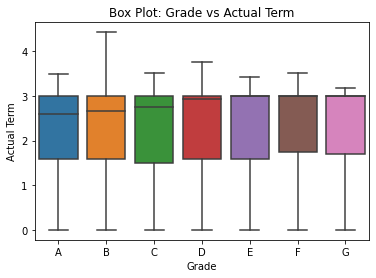

In [43]:
grade_order = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
sns.boxplot(x='grade', y='actualTerm', data=df, order = grade_order)

plt.xlabel('Grade')
plt.ylabel('Actual Term')
plt.title('Box Plot: Grade vs Actual Term')

# Display the plot
plt.show()

### Further Data Exploration

Let us look into loan purpose

In [44]:
df.groupby('purpose').size().sort_values(ascending = False)

purpose
debt_consolidation    63264
credit_card           27080
home_improvement       6187
other                  5670
major_purchase         2108
medical                1168
small_business         1113
car                    1083
moving                  754
vacation                753
house                   432
wedding                 197
renewable_energy         65
dtype: int64

In [45]:
df.groupby('purpose').agg(
    nLoans=('grade', 'size'),
    defaults=('loan_status', lambda x: sum(x == 'Charged Off')),
    avgInterest=('int_rate', 'mean'),
    avgLoanAMt=('loan_amnt', 'mean'),
    avgPmnt=('total_pymnt', 'mean'),
    avgActTerm=('actualTerm', 'mean'),
    avgActRet=('actualReturn', 'mean')
    
)

,nLoans,defaults,avgInterest,avgLoanAMt,avgPmnt,avgActTerm,avgActRet
purpose,,,,,,,
car,1083,124,11.61,8118.51,8780.36,2.23,5.39
credit_card,27080,3158,10.73,13574.28,14754.62,2.32,4.84
debt_consolidation,63264,9227,12.23,13195.14,14278.91,2.23,5.27
home_improvement,6187,775,11.75,12034.74,13001.74,2.23,5.40
house,432,70,14.68,12693.23,13699.56,2.10,6.70
major_purchase,2108,278,11.86,9553.07,10152.63,2.23,5.12
medical,1168,200,14.23,7424.02,7989.15,2.25,5.75
moving,754,136,15.60,6549.83,6999.70,2.26,5.94
other,5670,915,14.49,8242.84,9013.62,2.30,6.12


###### Looking into emp_length


In [46]:
df.groupby('emp_length').size()

emp_length
1 year        7333
10+ years    34335
2 years       9788
3 years       8881
4 years       6501
5 years       6967
6 years       5444
7 years       5571
8 years       5450
9 years       4186
< 1 year      8779
dtype: int64

###### Looking into annualInc 

###### Derived attributes

In [47]:
#proportion of satisfactory bankcard accounts 
df['propSatisBankcardAccts'] = df.apply(lambda x: x['num_bc_sats'] / x['num_bc_tl'] if x['num_bc_tl'] > 0 else 0, axis=1)
df['propSatisBankcardAccts']

0        1.00
1        1.00
2        0.50
3        0.46
4        0.50
         ... 
109995   0.50
109996   0.70
109997   1.00
109998   0.75
109999   0.67
Name: propSatisBankcardAccts, Length: 109874, dtype: float64

In [48]:
#calculating the length of borrower's history with LC i.e time between earliest_cr_line and issue_d
df['earliest_cr_line']

0         Aug-11
1         Dec-06
2         Feb-95
3         Nov-95
4         Feb-01
           ...  
109995    Jul-02
109996    Feb-95
109997    Aug-06
109998    Nov-95
109999    Apr-99
Name: earliest_cr_line, Length: 109874, dtype: object

In [49]:
df['issue_d']

0        2015-03-01
1        2014-05-01
2        2015-09-01
3        2014-05-01
4        2015-05-01
            ...    
109995   2013-11-01
109996   2014-10-01
109997   2015-09-01
109998   2013-05-01
109999   2014-07-01
Name: issue_d, Length: 109874, dtype: datetime64[ns]

In [50]:
#we will have to change the format of 'earliest_cr_line' to match with 'issue_d'
df['earliest_cr_line'] = df['earliest_cr_line'].apply(format_date)

In [51]:
df['earliest_cr_line']

0        2011-08-01
1        2006-12-01
2        1995-02-01
3        1995-11-01
4        2001-02-01
            ...    
109995   2002-07-01
109996   1995-02-01
109997   2006-08-01
109998   1995-11-01
109999   1999-04-01
Name: earliest_cr_line, Length: 109874, dtype: datetime64[ns]

In [52]:
df['issue_d'].dtypes

dtype('<M8[ns]')

In [53]:
df['borrHistory'] = (df['issue_d'] - df['earliest_cr_line']).dt.days / 365 #duration in years

In [54]:
df['borrHistory']

0         3.58
1         7.42
2        20.59
3        18.51
4        14.25
          ... 
109995   11.35
109996   19.68
109997    9.09
109998   17.51
109999   15.26
Name: borrHistory, Length: 109874, dtype: float64

In [55]:
#ratio of openAccounts to totalAccounts
df['openAccRatio'] = df['open_acc']/df['total_acc']

In [56]:
df.groupby('grade')['borrHistory'].mean()

grade
A   17.76
B   16.14
C   15.21
D   14.57
E   13.97
F   13.51
G   12.00
Name: borrHistory, dtype: float64

###### Removing variables for potential leakage:
Data leakage can occur when you include information in the model that would not be available at the time of making predictions. This can lead to overly optimistic performance measures and unreliable model predictions.

We can remove variables that directly or indirectly encode information about the target variable. For example, variables like total_rec_prncp or recoveries could potentially introduce leakage as they provide information about loan default.
Also, variables that represent future or post-event information that would not be available at the time of prediction can lead to potential leakage.

In [57]:
varsToRemove = [
    'funded_amnt_inv', 'term', 'emp_title', 'pymnt_plan', 'earliest_cr_line', 'title',
    'zip_code', 'addr_state', 'out_prncp', 'out_prncp_inv', 'total_pymnt_inv',
    'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
    'collection_recovery_fee', 'last_credit_pull_d', 'policy_code', 'disbursement_method',
    'debt_settlement_flag', 'settlement_term', 'application_type', 'last_pymnt_d',
    'last_pymnt_amnt', 'next_pymnt_d', 'deferral_term', 'payment_plan_start_date',
    'debt_settlement_flag_date', 'hardship_flag', 'hardship_type', 'hardship_reason',
    'hardship_status', 'deferral_term', 'hardship_amount', 'hardship_start_date',
    'hardship_end_date', 'hardship_length', 'hardship_dpd', 'hardship_loan_status',
    'orig_projected_additional_accrued_interest', 'hardship_payoff_balance_amount',
    'hardship_last_payment_amount', 'settlement_status', 'settlement_date',
    'settlement_amount', 'settlement_percentage', 'settlement_term'
]
df = df.drop(columns=varsToRemove)

In [58]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       ...
       'sec_app_num_rev_accts', 'sec_app_chargeoff_within_12_mths',
       'sec_app_collections_12_mths_ex_med',
       'sec_app_mths_since_last_major_derog', 'annRet', 'actualTerm',
       'actualReturn', 'propSatisBankcardAccts', 'borrHistory',
       'openAccRatio'],
      dtype='object', length=106)

In [59]:
df.shape

(109874, 106)

# Data Cleaning

## Missing values

In [60]:
(df.isnull().sum().sum())/(df.shape[0]*df.shape[1])

0.34330799498980136

So, our data has roughly 34.3% missing values

In [61]:
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing.sort_values(ascending= False)

id                100.00
member_id         100.00
desc              100.00
url               100.00
revol_bal_joint   100.00
                   ...  
delinq_amnt         0.00
delinq_2yrs         0.00
inq_last_6mths      0.00
open_acc            0.00
openAccRatio        0.00
Length: 106, dtype: float64

In [62]:
# Creating a dataframe to display percentage of null values in each column
a = pd.DataFrame()
a['Percentage of null values']=['25% or less','50% or more','75% or more', '100%']

p1 = len(df.columns[((df.isnull().sum())/len(df)) <= 0.25])
p2 = len(df.columns[((df.isnull().sum())/len(df)) >= 0.5])
p3 = len(df.columns[((df.isnull().sum())/len(df)) >= 0.75])
p4 = len(df.columns[((df.isnull().sum())/len(df)) == 1.0])


a['No.of columns'] = [p1,p2,p3,p4]
a

,Percentage of null values,No.of columns
0,25% or less,69
1,50% or more,37
2,75% or more,34
3,100%,15


This means we have 15 variables with all null values. We have also have only 69 columns with less than 25% null or missing values. 

We will remove all columns with more than 60% missing data since they will not be contributing much towards our analyses and prediction.

In [63]:
thresh = len(df) * .4
df.dropna(thresh = thresh, axis = 1, inplace = True)

In [64]:
df.shape

(109874, 70)

In [65]:
# Finding all numeric columns with missing values
numeric_cols = df.select_dtypes(include=['int', 'float'])
cols_with_missing = numeric_cols.columns[numeric_cols.isnull().any()]
missing_counts = numeric_cols[cols_with_missing].isnull().sum().sort_values(ascending=False)
print(missing_counts)

mths_since_last_delinq        55554
mths_since_recent_inq         12844
mo_sin_old_il_acct             8077
num_tl_120dpd_2m               7919
pct_tl_nvr_dlq                 4110
avg_cur_bal                    4090
num_tl_op_past_12m             4087
num_tl_90g_dpd_24m             4087
num_tl_30dpd                   4087
num_rev_tl_bal_gt_0            4087
tot_hi_cred_lim                4087
num_rev_accts                  4087
num_op_rev_tl                  4087
num_il_tl                      4087
num_bc_tl                      4087
num_actv_rev_tl                4087
num_actv_bc_tl                 4087
total_il_high_credit_limit     4087
num_accts_ever_120_pd          4087
total_rev_hi_lim               4087
mo_sin_rcnt_tl                 4087
mo_sin_rcnt_rev_tl_op          4087
mo_sin_old_rev_tl_op           4087
tot_coll_amt                   4087
tot_cur_bal                    4087
num_bc_sats                    2363
num_sats                       2363
percent_bc_gt_75            

Let's look at customer's credit history. We look at the number of open credit lines in the borrower's credit file.

In [66]:
df['open_acc'].describe()

count   109874.00
mean        11.39
std          5.23
min          0.00
25%          8.00
50%         10.00
75%         14.00
max         62.00
Name: open_acc, dtype: float64

Let's look at deliquency and see its relation with loan defualt. Deliquency occurs when the borrower make payments late (even by one day) or miss a regular installment payment or payments.

In [67]:
# mths_since_last_delinq: The number of months since the borrower's last delinquency.
df['mths_since_last_delinq'].describe()

count   54320.00
mean       34.19
std        21.83
min         0.00
25%        16.00
50%        31.00
75%        50.00
max       188.00
Name: mths_since_last_delinq, dtype: float64

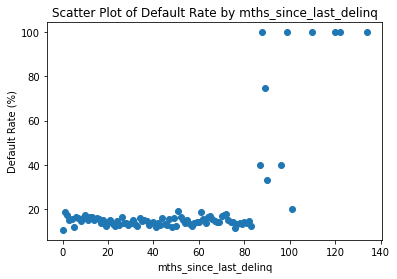

In [68]:
filtered_df = df[df['loan_status'] == 'Charged Off']
grouped_data = filtered_df.groupby('mths_since_last_delinq').size()
total_counts = df.groupby('mths_since_last_delinq').size()
default_rate = 100 * grouped_data / total_counts

x = default_rate.index
y = default_rate.values

plt.scatter(x, y)
plt.xlabel("mths_since_last_delinq")
plt.ylabel("Default Rate (%)")
plt.title("Scatter Plot of Default Rate by mths_since_last_delinq")
plt.show()



mths_since_last_delinq has some surprisingly high values with a very high default rate as well. Other than that, it does not convey much. The default rate for majority of the values stays less than 20%. 

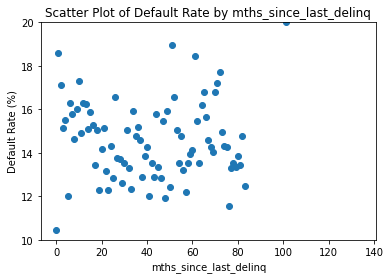

In [69]:
#Adjusting scale of y axis to see any patterns
x = default_rate.index
y = default_rate.values

plt.scatter(x, y)
plt.xlabel("mths_since_last_delinq")
plt.ylabel("Default Rate (%)")
plt.title("Scatter Plot of Default Rate by mths_since_last_delinq")

# Set the scale of the y-axis
plt.ylim(10, 20)
plt.show()

We can notice that loans with recent delinquencies (i.e., lower values of mths_since_last_delinq) tend to have higher default rates.

<AxesSubplot:xlabel='mths_since_last_delinq', ylabel='Count'>

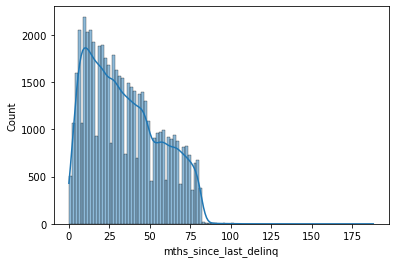

In [70]:
sns.histplot(df['mths_since_last_delinq'], kde=True)  

<AxesSubplot:xlabel='mo_sin_old_il_acct', ylabel='Count'>

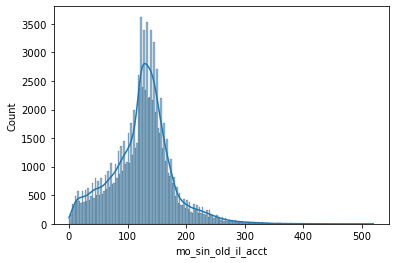

In [71]:
# mo_sin_old_il_acct: Number of months since the borrower's oldest installment account was opened.
sns.histplot(df['mo_sin_old_il_acct'], kde=True)  

<AxesSubplot:xlabel='avg_cur_bal', ylabel='Count'>

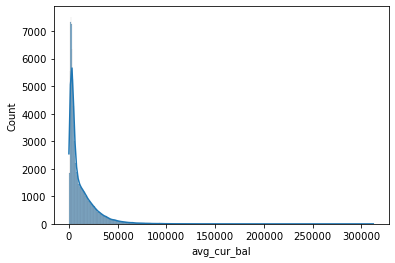

In [72]:
sns.histplot(df['avg_cur_bal'], kde=True)  

<AxesSubplot:xlabel='num_tl_120dpd_2m', ylabel='count'>

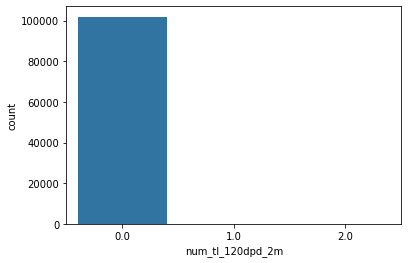

In [73]:
sns.countplot(data=df, x='num_tl_120dpd_2m')

<AxesSubplot:xlabel='pct_tl_nvr_dlq', ylabel='Count'>

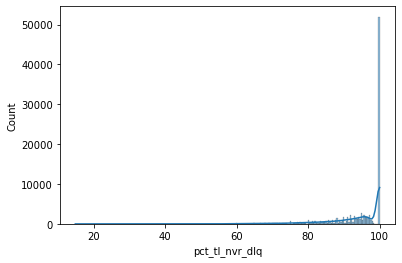

In [74]:
sns.histplot(df['pct_tl_nvr_dlq'], kde=True)  

<AxesSubplot:xlabel='num_tl_op_past_12m', ylabel='count'>

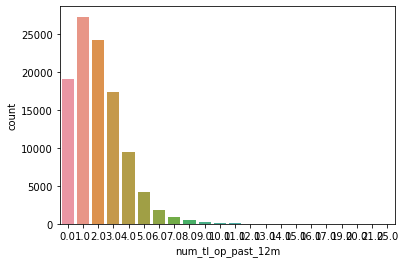

In [75]:
sns.countplot(data=df, x='num_tl_op_past_12m')

<AxesSubplot:xlabel='num_tl_90g_dpd_24m', ylabel='count'>

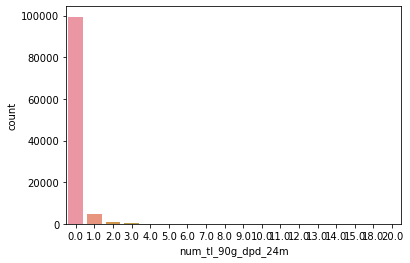

In [76]:
sns.countplot(data=df, x='num_tl_90g_dpd_24m')

<AxesSubplot:xlabel='num_bc_sats', ylabel='count'>

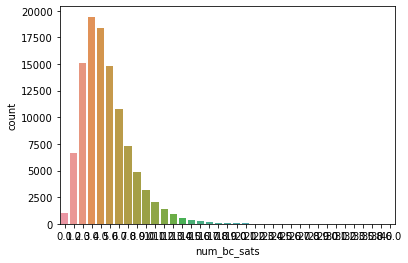

In [77]:
sns.countplot(data=df, x='num_bc_sats')

<AxesSubplot:xlabel='bc_util', ylabel='Count'>

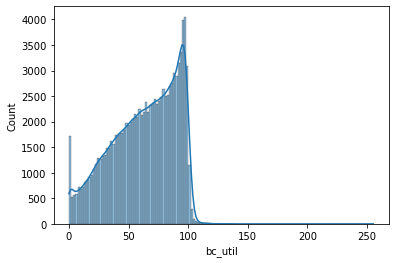

In [78]:
sns.histplot(df['bc_util'], kde=True)  

<AxesSubplot:xlabel='bc_open_to_buy', ylabel='Count'>

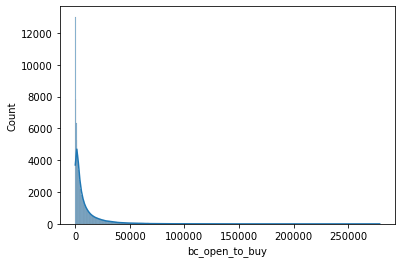

In [79]:
sns.histplot(df['bc_open_to_buy'], kde=True)  

<AxesSubplot:xlabel='acc_open_past_24mths', ylabel='count'>

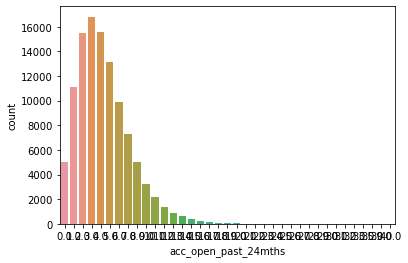

In [80]:
sns.countplot(data=df, x='acc_open_past_24mths')

In [81]:
df['mths_since_last_delinq'].isnull().sum()

55554

So we have about 55k missing values in this column. Since it has a relationship with default rate, we will want to consider this variable and hence we need to impute these missing values. The distribution seems skewed with outliers so we will be imputing missing values with median (not sensitive to outliers)

Another important feature could be mths_since_recent_inq i.e., Months since most recent inquiry.

In [82]:
df['mths_since_recent_inq'].value_counts(dropna = False)

NaN      12844
1.00     10744
2.00      8751
0.00      8561
3.00      7602
4.00      7029
5.00      6410
6.00      5662
7.00      5465
8.00      4789
9.00      4278
10.00     3678
11.00     3292
12.00     3043
13.00     2630
14.00     2407
15.00     2055
16.00     1760
17.00     1602
18.00     1469
19.00     1337
20.00     1171
21.00     1033
22.00      945
23.00      903
24.00      413
25.00        1
Name: mths_since_recent_inq, dtype: int64

In [83]:
#Here we are calculating the proportion of defaults ('Charged Off') for each unique value of 'mths_since_recent_inq'
cc = pd.crosstab(df['loan_status'], df['mths_since_recent_inq'].fillna('missing'))

default_rate = cc.loc['Charged Off'] / cc.sum(axis=0)
default_rate.fillna("missing", inplace=True)  # Replace NaN with 0 if there are missing values

print(default_rate)

mths_since_recent_inq
0.0       0.17
1.0       0.17
2.0       0.16
3.0       0.16
4.0       0.15
5.0       0.14
6.0       0.14
7.0       0.14
8.0       0.14
9.0       0.13
10.0      0.14
11.0      0.13
12.0      0.12
13.0      0.13
14.0      0.13
15.0      0.12
16.0      0.12
17.0      0.11
18.0      0.10
19.0      0.10
20.0      0.11
21.0      0.12
22.0      0.12
23.0      0.12
24.0      0.11
25.0      0.00
missing   0.10
dtype: float64


The default rate for missing values is closer to the larger values of 'mths_since_recent_inq'.  So if we have to impute missing values, we can replace them with large values of 'mths_since_recent_inq' (i.e., 18,19,20).

In [84]:
df['mths_since_recent_inq'] = df['mths_since_recent_inq'].fillna(19.0)

In [85]:
for col in cols_with_missing:
    if col != 'mths_since_recent_inq':
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)

In [86]:
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing.sort_values(ascending= False)

emp_length                 6.04
loan_amnt                  0.00
num_bc_sats                0.00
num_sats                   0.00
num_rev_tl_bal_gt_0        0.00
                           ... 
avg_cur_bal                0.00
bc_open_to_buy             0.00
bc_util                    0.00
chargeoff_within_12_mths   0.00
openAccRatio               0.00
Length: 70, dtype: float64

In [87]:
df.shape

(109874, 70)

In [88]:
df.head()

,loan_amnt,funded_amnt,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,annRet,actualTerm,actualReturn,propSatisBankcardAccts,borrHistory,openAccRatio
0,4400,4400,22.99,170.30,F,F1,3 years,RENT,22000.00,Source Verified,...,11844.00,10067.00,1300.00,10044.00,13.03,3.00,13.02,1.00,3.58,0.80
1,5850,5850,21.99,223.39,E,E4,< 1 year,MORTGAGE,19500.00,Verified,...,68500.00,1700.00,2500.00,0.00,3.00,0.83,10.81,1.00,7.42,0.50
2,5000,5000,6.24,152.66,A,A2,6 years,MORTGAGE,48824.00,Source Verified,...,63200.00,31681.00,43200.00,20000.00,3.31,3.00,3.30,0.50,20.59,0.33
3,1600,1600,14.99,55.46,C,C5,10+ years,MORTGAGE,50000.00,Source Verified,...,251137.00,148079.00,20600.00,124737.00,4.99,1.08,13.81,0.46,18.51,0.35
4,16000,16000,9.17,510.07,B,B2,10+ years,MORTGAGE,114000.00,Not Verified,...,117947.00,80871.00,20000.00,62047.00,4.43,2.09,6.37,0.50,14.25,0.33


In [89]:
varsOmit = ['actualTerm', 'actualReturn', 'annRet', 'total_pymnt']
loan_df = df.drop(columns=varsOmit)
loan_df.shape

(109874, 66)

In [90]:
df['mths_since_last_delinq'].dtypes

dtype('float64')

In [91]:
df['borrHistory'].dtypes

dtype('float64')

In [92]:
df['issue_d'].dtypes

dtype('<M8[ns]')

In [93]:
# Extracting year, month, and day from the 'issue_d' datetime feature
loan_df['issue_year'] = loan_df['issue_d'].dt.year
loan_df['issue_month'] = loan_df['issue_d'].dt.month
loan_df['issue_day'] = loan_df['issue_d'].dt.day

# Dropping the original 'issue_d' datetime column
loan_df.drop(['issue_d'], axis=1, inplace=True)


In [94]:
loan_df['loan_status'].value_counts()

Fully Paid     94567
Charged Off    15307
Name: loan_status, dtype: int64

In [95]:
loan_df.isnull().sum()

loan_amnt       0
funded_amnt     0
int_rate        0
installment     0
grade           0
               ..
borrHistory     0
openAccRatio    0
issue_year      0
issue_month     0
issue_day       0
Length: 68, dtype: int64

In [96]:
X = loan_df.drop('loan_status', axis = 1)
y = loan_df['loan_status']

In [97]:
object_vars=X.select_dtypes(include='object').columns.tolist()
X = pd.get_dummies(X,columns=object_vars,drop_first=True) 

In [98]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [99]:
y

array([1, 1, 1, ..., 1, 1, 0])

In [100]:
feature_names = X.columns

In [101]:
# Assuming feature_names is a list of feature names
name_issue = []

for name in feature_names:
    if '[' in name or ']' in name or '<' in name:
        name_issue.append(name)

print(name_issue)


['emp_length_< 1 year']


In [102]:
X.rename(columns={'emp_length_< 1 year': 'emp_length_lessthan1 year'}, inplace= True)

In [103]:
X['emp_length_lessthan1 year']

0         0
1         1
2         0
3         0
4         0
         ..
109995    0
109996    0
109997    1
109998    0
109999    0
Name: emp_length_lessthan1 year, Length: 109874, dtype: uint8

In [104]:
class_0_label = label_encoder.classes_[0]
class_1_label = label_encoder.classes_[1]

print(f"Class 0 Label: {class_0_label}, Encoded Value: 0")
print(f"Class 1 Label: {class_1_label}, Encoded Value: 1")

Class 0 Label: Charged Off, Encoded Value: 0
Class 1 Label: Fully Paid, Encoded Value: 1


In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [106]:
pd.set_option('display.max_rows', None)

In [107]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [108]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tqdm import tqdm

rf_classifier = RandomForestClassifier(class_weight='balanced', random_state=42)

with tqdm(total=100, desc="Training Random Forest") as pbar:
    rf_classifier.fit(X_train, y_train)
    pbar.update(100)

# Making predictions on the test data
y_pred_rf = rf_classifier.predict(X_test)

# Evaluating the RandomForestClassifier's performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

print("Random Forest Classifier:")
print(f"Accuracy: {accuracy_rf:.2f}")
print("Confusion Matrix:")
print(conf_matrix_rf)
print("\nClassification Report:")
print(classification_rep_rf)


Training Random Forest: 100%|████████████████████████████████████████████████████████| 100/100 [03:05<00:00,  1.85s/it]


Random Forest Classifier:
Accuracy: 0.86
Confusion Matrix:
[[    0  3056]
 [    2 18917]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3056
           1       0.86      1.00      0.93     18919

    accuracy                           0.86     21975
   macro avg       0.43      0.50      0.46     21975
weighted avg       0.74      0.86      0.80     21975



In [109]:
#Using Smote to handle class imbalance
from imblearn.over_sampling import SMOTE

rf_classifier = RandomForestClassifier(random_state=42)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

with tqdm(total=100, desc="Training Random Forest") as pbar:
    rf_classifier.fit(X_train_resampled, y_train_resampled)
    pbar.update(100)

y_pred_rf = rf_classifier.predict(X_test)

# Evaluating the RandomForestClassifier's performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

print("Random Forest Classifier after SMOTE Resampling:")
print(f"Accuracy: {accuracy_rf:.2f}")
print("Confusion Matrix:")
print(conf_matrix_rf)
print("\nClassification Report:")
print(classification_rep_rf)


Training Random Forest: 100%|████████████████████████████████████████████████████████| 100/100 [05:49<00:00,  3.50s/it]


Random Forest Classifier after SMOTE Resampling:
Accuracy: 0.86
Confusion Matrix:
[[   41  3015]
 [   66 18853]]

Classification Report:
              precision    recall  f1-score   support

           0       0.38      0.01      0.03      3056
           1       0.86      1.00      0.92     18919

    accuracy                           0.86     21975
   macro avg       0.62      0.50      0.48     21975
weighted avg       0.80      0.86      0.80     21975



In [110]:
import xgboost as xgb
from sklearn.metrics import f1_score

# Range of weight values for Class 0 (Charged Off)
weight_values = [1.0, 2.0, 3.0, 4.0, 5.0]  

best_weights = None
best_metric = 0.0  

for weight in weight_values:
    # Creating an XGBoost classifier with the current weight settings
    xgb_classifier = xgb.XGBClassifier(random_state=42, scale_pos_weight=1.0, scale_neg_weight=weight)
    
    # Fitting the model on the training data with tqdm
    with tqdm(total=len(X_train), desc=f"Training XGBoost (Weight={weight})") as pbar:
        xgb_classifier.fit(X_train, y_train)
        pbar.update(len(X_train))  # Update the progress bar
    
    # Predictions on the test data
    y_pred_xgb = xgb_classifier.predict(X_test)
    
    #Evaluating performance
    metric = f1_score(y_test, y_pred_xgb, average='weighted')
    
    if metric > best_metric:
        best_metric = metric
        best_weights = weight

print(f"Best Class 0 Weight: {best_weights}")

Training XGBoost (Weight=1.0):   0%|                                                         | 0/87899 [00:00<?, ?it/s]

[18:07:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "scale_neg_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




Training XGBoost (Weight=2.0):   0%|                                                         | 0/87899 [00:00<?, ?it/s]

[18:07:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "scale_neg_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




Training XGBoost (Weight=3.0):   0%|                                                         | 0/87899 [00:00<?, ?it/s]

[18:07:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "scale_neg_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




Training XGBoost (Weight=4.0):   0%|                                                         | 0/87899 [00:00<?, ?it/s]

[18:08:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "scale_neg_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




Training XGBoost (Weight=5.0):   0%|                                                         | 0/87899 [00:00<?, ?it/s]

[18:08:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "scale_neg_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




Training XGBoost (Weight=5.0): 100%|███████████████████████████████████████████| 87899/87899 [00:17<00:00, 4885.90it/s]

Best Class 0 Weight: 1.0


In [111]:
# Define class weights (1.0 for both classes)
class_weights = {
    0: 1.0,  # Weight for Class 0 (Charged Off)
    1: 1.0   # Weight for Class 1 (Fully Paid)
}

xgb_classifier = xgb.XGBClassifier(random_state=42, scale_pos_weight=class_weights[1])

# Fit the model on the training data with tqdm
with tqdm(total=len(X_train), desc="Training XGBoost (Weight=1.0)") as pbar:
    xgb_classifier.fit(X_train, y_train)
    pbar.update(len(X_train))  # Updating the progress bar

# Predictions on the test data
y_pred_xgb = xgb_classifier.predict(X_test)

classification_report_per_class = classification_report(y_test, y_pred_xgb, target_names=["Class 0 (Charged Off)", "Class 1 (Fully Paid)"])
print("Classification Report for Each Class:")
print(classification_report_per_class)

# Calculate and display the confusion matrix for each class separately
confusion_matrix_class_0 = confusion_matrix(y_test, y_pred_xgb, labels=[0, 1])
confusion_matrix_class_1 = confusion_matrix(y_test, y_pred_xgb, labels=[1, 0])

print("\nConfusion Matrix for Class 0 (Charged Off):")
print(confusion_matrix_class_0)

print("\nConfusion Matrix for Class 1 (Fully Paid):")
print(confusion_matrix_class_1)

Training XGBoost (Weight=1.0): 100%|███████████████████████████████████████████| 87899/87899 [00:15<00:00, 5682.76it/s]

Classification Report for Each Class:
                       precision    recall  f1-score   support

Class 0 (Charged Off)       0.38      0.03      0.05      3056
 Class 1 (Fully Paid)       0.86      0.99      0.92     18919

             accuracy                           0.86     21975
            macro avg       0.62      0.51      0.49     21975
         weighted avg       0.80      0.86      0.80     21975


Confusion Matrix for Class 0 (Charged Off):
[[   88  2968]
 [  142 18777]]

Confusion Matrix for Class 1 (Fully Paid):
[[18777   142]
 [ 2968    88]]


In [112]:
pip install lightgbm

In [113]:
import lightgbm as lgb

# Range of weight values for Class 0 (Charged Off)
weight_values = [1.0, 2.0, 3.0, 4.0, 5.0] 

# Initializing variables to store the best weights and corresponding evaluation metric
best_weights = None
best_metric = 0.0  

# Iterating through weight values
for weight in weight_values:
    # Creating a LightGBM classifier with the current weight settings
    lgb_classifier = lgb.LGBMClassifier(class_weight={0: weight, 1: 1.0}, random_state=42)
    
    # Fitting the model on training data with tqdm
    with tqdm(total=len(X_train), desc=f"Training LightGBM (Weight={weight})") as pbar:
        lgb_classifier.fit(X_train, y_train)
        pbar.update(len(X_train))  # Update the progress bar
    
    # Make predictions on the test data
    y_pred_lgb = lgb_classifier.predict(X_test)
    
    metric = f1_score(y_test, y_pred_lgb, average='weighted')
    
    # Checking if the current weights result in a better metric
    if metric > best_metric:
        best_metric = metric
        best_weights = weight

print(f"Best Class 0 Weight: {best_weights}")

Training LightGBM (Weight=1.0):   0%|                                                        | 0/87899 [00:00<?, ?it/s]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 75648, number of negative: 12251
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.028961 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7594
[LightGBM] [Info] Number of data points in the train set: 87899, number of used features: 123
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.860624 -> initscore=1.820483
[LightGBM] [Info] Start training from score 1.820483


Training LightGBM (Weight=2.0):   0%|                                                        | 0/87899 [00:00<?, ?it/s]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 75648, number of negative: 12251
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.025867 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7594
[LightGBM] [Info] Number of data points in the train set: 87899, number of used features: 123
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.755347 -> initscore=1.127336
[LightGBM] [Info] Start training from score 1.127336


Training LightGBM (Weight=3.0):   0%|                                                        | 0/87899 [00:00<?, ?it/s]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 75648, number of negative: 12251
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.038290 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7594
[LightGBM] [Info] Number of data points in the train set: 87899, number of used features: 123
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.673019 -> initscore=0.721871
[LightGBM] [Info] Start training from score 0.721871


Training LightGBM (Weight=4.0):   0%|                                                        | 0/87899 [00:00<?, ?it/s]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 75648, number of negative: 12251
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.025966 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7594
[LightGBM] [Info] Number of data points in the train set: 87899, number of used features: 123
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.606874 -> initscore=0.434189
[LightGBM] [Info] Start training from score 0.434189


Training LightGBM (Weight=5.0):   0%|                                                        | 0/87899 [00:00<?, ?it/s]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 75648, number of negative: 12251
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.030118 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7594
[LightGBM] [Info] Number of data points in the train set: 87899, number of used features: 123
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.552566 -> initscore=0.211046
[LightGBM] [Info] Start training from score 0.211046


Training LightGBM (Weight=5.0): 100%|█████████████████████████████████████████| 87899/87899 [00:03<00:00, 27312.70it/s]

Best Class 0 Weight: 3.0


In [114]:
class_weights = {
    0: 3.0,  # Weight for Class 0 (Charged Off)
    1: 1.0   # Weight for Class 1 (Fully Paid)
}

lgb_classifier1 = lgb.LGBMClassifier(class_weight=class_weights, random_state=42)

# Fitting the model
lgb_classifier1.fit(X_train, y_train)

# Make predictions on the test data
y_pred_lgb = lgb_classifier1.predict(X_test)

# Display the classification report for each class separately
classification_report_per_class = classification_report(y_test, y_pred_lgb, target_names=["Class 0 (Charged Off)", "Class 1 (Fully Paid)"])
print("Classification Report for Each Class:")
print(classification_report_per_class)

# Calculate and display the confusion matrix for each class separately
confusion_matrix_class_0 = confusion_matrix(y_test, y_pred_lgb, labels=[0, 1])
confusion_matrix_class_1 = confusion_matrix(y_test, y_pred_lgb, labels=[1, 0])

print("\nConfusion Matrix for Class 0 (Charged Off):")
print(confusion_matrix_class_0)

print("\nConfusion Matrix for Class 1 (Fully Paid):")
print(confusion_matrix_class_1)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 75648, number of negative: 12251
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.041426 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7594
[LightGBM] [Info] Number of data points in the train set: 87899, number of used features: 123
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.673019 -> initscore=0.721871
[LightGBM] [Info] Start training from score 0.721871
Classification Report for Each Class:
                       precision    recall  f1-score   support

Class 0 (Charged Off)       0.31      0.22      0.26      3056
 Class 1 (Fully Paid)       0.88      0.92      0.90     18919

             accuracy                           0.82     21975
            macro avg       0.59      0.57      0.58     21975
         weighted avg       0.80      0.82      0.81     21975


Confusi

In [115]:
class_weights = {
    0: 5.0,  # Weight for Class 0 (Charged Off)
    1: 1.0   # Weight for Class 1 (Fully Paid)
}

# Create a LightGBM classifier with class weights
lgb_classifier2 = lgb.LGBMClassifier(class_weight=class_weights, random_state=42)

# Fit the model
lgb_classifier2.fit(X_train, y_train)

# Make predictions on the test data
y_pred_lgb = lgb_classifier2.predict(X_test)

# Display the classification report for each class separately
classification_report_per_class = classification_report(y_test, y_pred_lgb, target_names=["Class 0 (Charged Off)", "Class 1 (Fully Paid)"])
print("Classification Report for Each Class:")
print(classification_report_per_class)

# Calculate and display the confusion matrix for each class separately
confusion_matrix_class_0 = confusion_matrix(y_test, y_pred_lgb, labels=[0, 1])
confusion_matrix_class_1 = confusion_matrix(y_test, y_pred_lgb, labels=[1, 0])

print("\nConfusion Matrix for Class 0 (Charged Off):")
print(confusion_matrix_class_0)

print("\nConfusion Matrix for Class 1 (Fully Paid):")
print(confusion_matrix_class_1)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 75648, number of negative: 12251
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.037576 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7594
[LightGBM] [Info] Number of data points in the train set: 87899, number of used features: 123
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.552566 -> initscore=0.211046
[LightGBM] [Info] Start training from score 0.211046
Classification Report for Each Class:
                       precision    recall  f1-score   support

Class 0 (Charged Off)       0.25      0.51      0.33      3056
 Class 1 (Fully Paid)       0.90      0.75      0.82     18919

             accuracy                           0.71     21975
            macro avg       0.58      0.63      0.58     21975
         weighted avg       0.81      0.71      0.75     21975


Confusi

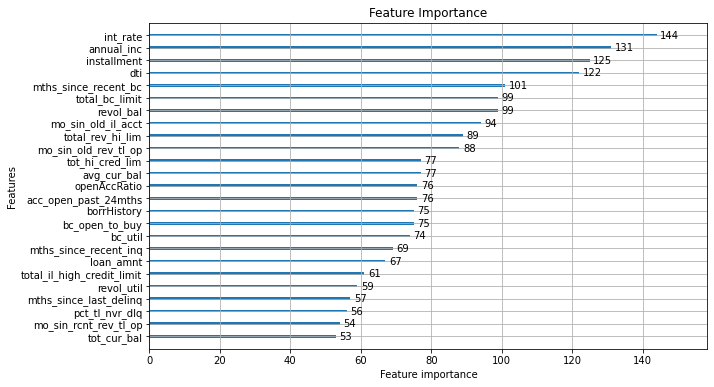

In [116]:
# Plotting feature importance
lgb.plot_importance(lgb_classifier2, max_num_features=25, figsize=(10, 6), title='Feature Importance')

plt.show()

In [117]:
# Get feature importances from the model
feature_importance = lgb_classifier2.feature_importances_

feature_names = X_train.columns

# Creating a DataFrame to store the feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

num_top_features = 25  
top_features = feature_importance_df.head(num_top_features)

print(top_features)

                       Feature  Importance
2                     int_rate         144
4                   annual_inc         131
3                  installment         125
5                          dti         122
30        mths_since_recent_bc         101
11                   revol_bal          99
52              total_bc_limit          99
25          mo_sin_old_il_acct          94
18            total_rev_hi_lim          89
26        mo_sin_old_rev_tl_op          88
20                 avg_cur_bal          77
50             tot_hi_cred_lim          77
56                openAccRatio          76
19        acc_open_past_24mths          76
55                 borrHistory          75
21              bc_open_to_buy          75
22                     bc_util          74
31       mths_since_recent_inq          69
0                    loan_amnt          67
53  total_il_high_credit_limit          61
12                  revol_util          59
8       mths_since_last_delinq          57
46         